In [1]:
from Agent import Agent
from Classes import Action, Needs
from State import State
from World import Day

import numpy as np
import json

In [2]:
def save_actions_history(agent: Agent, filename: str):
    actions_json = json.dumps(agent.actions_history)
    with open(filename, "w") as f:
        f.write(actions_json)
        # for action in agent.actions_history:
            # f.write(f"{action}\n")

In [8]:
def normalize(x, x_min, x_max):
        return (x - x_min) / (x_max - x_min)

def normalize_custom(arr, min_val, max_val):
        min_arr = np.min(arr)
        max_arr = np.max(arr)
        normalized_arr = (arr - min_arr) * (max_val - min_val) / (max_arr - min_arr) + min_val
        return normalized_arr

def hunger_function():
    x_values = np.linspace(0, 100, 1000)
    y_values = np.exp(0.05 * x_values)
    y_values =  normalize(y_values, np.min(y_values), np.max(y_values))
    
    return [x_values, y_values]

def bathroom_function():
    x_values = np.linspace(0, 100, 1000)
    y_values = np.exp(0.1 * x_values)
    y_values =  normalize(y_values, np.min(y_values), np.max(y_values))
    
    return [x_values, y_values]

def tiredness_function():
    x_values = np.linspace(0, 100, 1000)
    y_values = np.exp(0.4 * x_values)
    y_values =  normalize(y_values, np.min(y_values), np.max(y_values))
    
    return [x_values, y_values]

def detective_function():
    x_values = np.linspace(0, 100, 1000)
    y_values = - np.log(x_values + 1) + 1
    y_values = normalize_custom(y_values, 0.4, 0.8)
    return x_values, y_values

def relax_function():
    x_values = np.linspace(0, 100, 1000)
    y_values = - (x_values ** 2)
    
    y_values = normalize_custom(y_values, 0.2, 0.6)
    return x_values, y_values

In [9]:
# Defining base actions
# TODO: remeber actions having the states they change

# Eating
eat_meal = Action("eat_meal", 40, 30)
eat_snack = Action("eat_snack", 10, 5)

# Solving crimes
detect_lie = Action("solve_crime", 10, 10)

# Chilling
watch_tv = Action("watch_tv", 10, 30)
hear_music = Action("hear_music", 10, 10)

# Peeing
go_bathroom = Action("go_bathroom", 80, 10)

# Sleeping
nap = Action("nap", 30, 60)
sleep = Action("sleep", 90, 120)


In [11]:
# Defining the day here so every time it is run, time is restarted
day = Day()

# Defining the states for the main agent (Perry). These states are teh object being modified, so if they are not rewritten when playing this cell, they will continue to increase.
perry_states = {"hunger" : State(Needs.HL, hunger_function,  0, 100),
                "tiredness" : State(Needs.TL, tiredness_function, 0, 100),
                "bladder" : State(Needs.BL, bathroom_function, 0, 100),
                "detectiveness" : State(Needs.DN, detective_function, 0, 100),
                "relaxation" : State(Needs.RN, relax_function, 0, 100)
                }

# Defining the agent
perry = Agent("Perry", day, perry_states)
print("\nPerry after creating", perry, sep="\n")

day.add_observer_agent(perry)

day.tick_in_min(10)
print("\nPerry after 10 minutes (increased through the day)", perry, sep="\n")

day.tick_in_min(10)
print("\nPerry after 10 minutes (increased through the day)", perry, sep="\n")

print("\nPerry choosing its first activity")
chosen_activity = perry.choose_activity(verbose = True)
def call_activity(chosen_activity):
    match chosen_activity:
        case Needs.HL:
            print("\nPerry is hungry")
            perry.eat(eat_meal)
        case Needs.BL:
            print("\nPerry needs to go to the bathroom")
            perry.go_bathroom(go_bathroom)
        case Needs.TL:
            print("\nPerry is tired")
            perry.sleep(sleep)
        case Needs.DN:
            print("\nPerry is in detective mode")
            perry.solve_crime(detect_lie)
        case Needs.RN:
            print("\nPerry is relaxing")
            perry.relax(hear_music)

call_activity(chosen_activity)
print("\nPerry after choosing #1 activity", perry, sep="\n")

chosen_activity = perry.choose_activity(verbose = True)
call_activity(chosen_activity)
print("\nPerry after choosing #2 activity", perry, sep="\n")

chosen_activity = perry.choose_activity(verbose = True)
call_activity(chosen_activity)
print("\nPerry after choosing #3 activity", perry, sep="\n")

chosen_activity = perry.choose_activity(verbose = True)
call_activity(chosen_activity)
print("\nPerry after choosing #4 activity", perry, sep="\n")

chosen_activity = perry.choose_activity(verbose = True)
call_activity(chosen_activity)
print("\nPerry after choosing #5 activity", perry, sep="\n")

chosen_activity = perry.choose_activity(verbose = True)
call_activity(chosen_activity)
print("\nPerry after choosing #6 activity", perry, sep="\n")

day.tick_in_min(800)
print("\nPerry after 800 minutes (increased through the day)", perry, sep="\n")

chosen_activity = perry.choose_activity(verbose = True)
call_activity(chosen_activity)
print("\nPerry after choosing #7 activity", perry, sep="\n")

chosen_activity = perry.choose_activity(verbose = True)
call_activity(chosen_activity)
print("\nPerry after choosing #8 activity", perry, sep="\n")

chosen_activity = perry.choose_activity(verbose = True)
call_activity(chosen_activity)
print("\nPerry after choosing #9 activity", perry, sep="\n")

chosen_activity = perry.choose_activity(verbose = True)
call_activity(chosen_activity)
print("\nPerry after choosing #10 activity", perry, sep="\n")

chosen_activity = perry.choose_activity(verbose = True)
call_activity(chosen_activity)
print("\nPerry after choosing #11 activity", perry, sep="\n")

chosen_activity = perry.choose_activity(verbose = True)
call_activity(chosen_activity)
print("\nPerry after choosing #12 activity", perry, sep="\n")

chosen_activity = perry.choose_activity(verbose = True)
call_activity(chosen_activity)
print("\nPerry after choosing #13 activity", perry, sep="\n")

chosen_activity = perry.choose_activity(verbose = True)
call_activity(chosen_activity)
print("\nPerry after choosing #14 activity", perry, sep="\n")

chosen_activity = perry.choose_activity(verbose = True)
call_activity(chosen_activity)
print("\nPerry after choosing #15 activity", perry, sep="\n")

save_actions_history(perry, "actions_history.json")


Perry after creating
Perry T0 - Hunger: 0, Tiredness: 0, Bladder: 0, Detectiveness: 0, Relaxation: 0

Perry after 10 minutes (increased through the day)
Perry T10 - Hunger: 4.17, Tiredness: 1.04, Bladder: 5.56, Detectiveness: 1.61, Relaxation: 2.08

Perry after 10 minutes (increased through the day)
Perry T20 - Hunger: 8.34, Tiredness: 2.08, Bladder: 11.12, Detectiveness: 3.22, Relaxation: 4.16

Perry choosing its first activity
HungerLevel: the y value for x = 8.34 (with index 83) is 0.003493582034759708
TirednessLevel: the y value for x = 2.08 (with index 21) is 5.600671229482902e-18
BladderLevel: the y value for x = 11.12 (with index 111) is 9.251707984300384e-05
DetectiveNeed: the y value for x = 3.22 (with index 32) is 0.6755528141207996
RelaxationNeed: the y value for x = 4.16 (with index 42) is 0.599292986680374

Perry is in detective mode
DetectiveNeed: 0
{"name": "solve_crime", "value": 10, "time_in_min": 10}

Perry after choosing #1 activity
Perry T30 - Hunger: 12.51, Tiredn

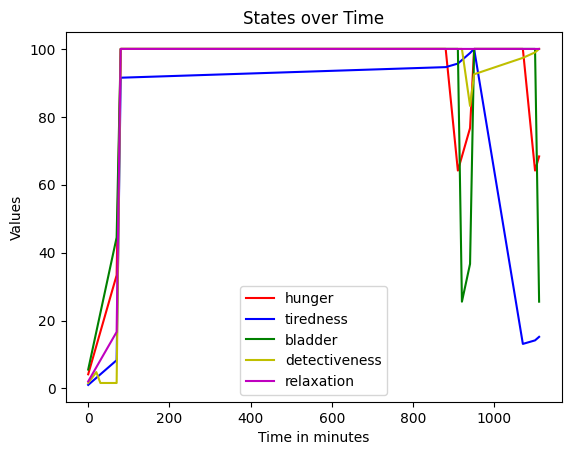

In [14]:
import json
import matplotlib.pyplot as plt

actions_history = "actions_history_2.json"
with open(actions_history, "r") as f:
    data = json.load(f)

#"relaxation_increase": 0.2083, "modified_hunger_value": 68.34, "modified_tiredness_value": 15.2, "modified_bladder_value": 25.56, "modified_detectiveness_value": 100, "modified_relaxation_value": 100,

# Extract the values into lists
time = [item['current_time'] for item in data]
hunger = [item['modified_hunger_value'] for item in data]
tiredness = [item['modified_tiredness_value'] for item in data]
bladder = [item['modified_bladder_value'] for item in data]
detectiveness = [item['modified_detectiveness_value'] for item in data]
relaxation = [item['modified_relaxation_value'] for item in data]

# Plot x1 and x2 over time
plt.plot(time, hunger, label='hunger', color='r')
plt.plot(time, tiredness, label='tiredness', color='b')
plt.plot(time, bladder, label='bladder', color='g')
plt.plot(time, detectiveness, label='detectiveness', color='y')
plt.plot(time, relaxation, label='relaxation', color='m')

plt.xlabel('Time in minutes')
plt.ylabel('Values')
plt.title('States over Time')
plt.legend()
plt.show()